In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df=pd.read_csv('insurance.csv')

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [16]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [17]:
from sklearn.preprocessing import OneHotEncoder

#Extract categorical columns from the dataframe
#Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

# Display the resulting dataframe
df_encoded

df_encoded.to_csv("insurance_new.csv")

In [18]:
## Independent And dependent features
X=df_encoded.drop('charges',axis=1)
y=df_encoded['charges']

In [19]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [20]:
df_encoded.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [21]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [22]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [23]:
X_train.shape,X_test.shape

((1003, 11), (335, 11))

In [24]:
## Feature Selection based on correlaltion
X_train.corr()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.111325,0.055070,0.012385,-0.012385,0.037916,-0.037916,-0.012805,0.016715,-0.023557,0.020113
bmi,0.111325,1.000000,-0.003459,-0.001931,0.001931,0.001499,-0.001499,-0.154166,-0.109244,0.238183,0.022136
children,0.055070,-0.003459,1.000000,-0.016610,0.016610,-0.025488,0.025488,0.009031,0.038969,-0.032380,-0.015102
sex_female,0.012385,-0.001931,-0.016610,1.000000,-1.000000,0.054671,-0.054671,-0.010928,-0.031963,0.025798,0.016700
sex_male,-0.012385,0.001931,0.016610,-1.000000,1.000000,-0.054671,0.054671,0.010928,0.031963,-0.025798,-0.016700
smoker_no,0.037916,0.001499,-0.025488,0.054671,-0.054671,1.000000,-1.000000,-0.013951,0.031689,-0.044016,0.027094
smoker_yes,-0.037916,-0.001499,0.025488,-0.054671,0.054671,-1.000000,1.000000,0.013951,-0.031689,0.044016,-0.027094
region_northeast,-0.012805,-0.154166,0.009031,-0.010928,0.010928,-0.013951,0.013951,1.000000,-0.329342,-0.340872,-0.330229
region_northwest,0.016715,-0.109244,0.038969,-0.031963,0.031963,0.031689,-0.031689,-0.329342,1.000000,-0.336343,-0.325842
region_southeast,-0.023557,0.238183,-0.032380,0.025798,-0.025798,-0.044016,0.044016,-0.340872,-0.336343,1.000000,-0.337249


## Feature Selection

<AxesSubplot: >

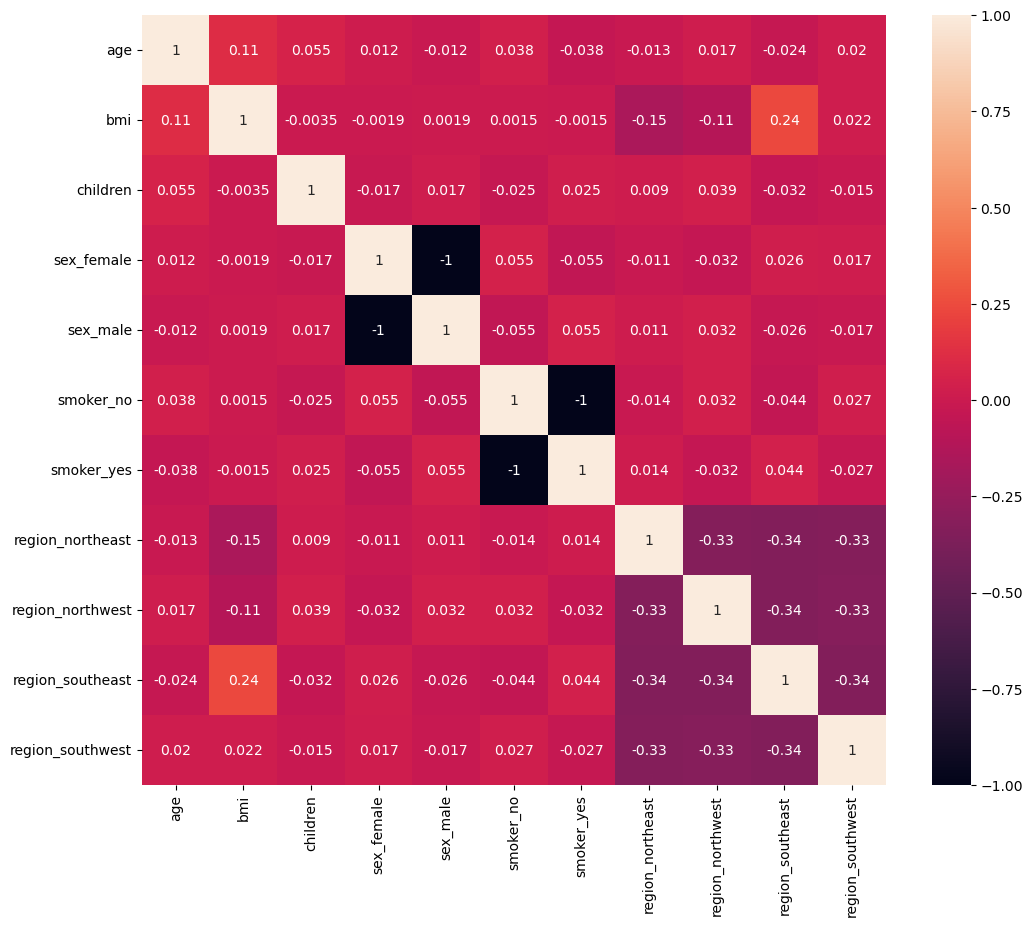

In [25]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)


In [26]:
X_train.corr()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.111325,0.055070,0.012385,-0.012385,0.037916,-0.037916,-0.012805,0.016715,-0.023557,0.020113
bmi,0.111325,1.000000,-0.003459,-0.001931,0.001931,0.001499,-0.001499,-0.154166,-0.109244,0.238183,0.022136
children,0.055070,-0.003459,1.000000,-0.016610,0.016610,-0.025488,0.025488,0.009031,0.038969,-0.032380,-0.015102
sex_female,0.012385,-0.001931,-0.016610,1.000000,-1.000000,0.054671,-0.054671,-0.010928,-0.031963,0.025798,0.016700
sex_male,-0.012385,0.001931,0.016610,-1.000000,1.000000,-0.054671,0.054671,0.010928,0.031963,-0.025798,-0.016700
smoker_no,0.037916,0.001499,-0.025488,0.054671,-0.054671,1.000000,-1.000000,-0.013951,0.031689,-0.044016,0.027094
smoker_yes,-0.037916,-0.001499,0.025488,-0.054671,0.054671,-1.000000,1.000000,0.013951,-0.031689,0.044016,-0.027094
region_northeast,-0.012805,-0.154166,0.009031,-0.010928,0.010928,-0.013951,0.013951,1.000000,-0.329342,-0.340872,-0.330229
region_northwest,0.016715,-0.109244,0.038969,-0.031963,0.031963,0.031689,-0.031689,-0.329342,1.000000,-0.336343,-0.325842
region_southeast,-0.023557,0.238183,-0.032380,0.025798,-0.025798,-0.044016,0.044016,-0.340872,-0.336343,1.000000,-0.337249


## Feature Scaling Or Standardization

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [28]:
X_train_scaled

array([[-1.08716652, -1.14087456, -0.91749963, ...,  1.75420517,
        -0.59001549, -0.57159389],
       [-0.80210593, -0.66584152,  0.7436053 , ..., -0.57005875,
         1.69487075, -0.57159389],
       [ 0.83699246,  1.52879447, -0.08694717, ..., -0.57005875,
        -0.59001549,  1.74949385],
       ...,
       [ 1.33584849, -0.8879673 , -0.91749963, ..., -0.57005875,
        -0.59001549, -0.57159389],
       [-0.1607196 ,  2.84324666,  0.7436053 , ..., -0.57005875,
        -0.59001549,  1.74949385],
       [ 1.12205304, -0.10179179, -0.91749963, ..., -0.57005875,
        -0.59001549,  1.74949385]])

## Box Plots To understand Effect Of Standard Scaler

/tmp/ipykernel_1893/160744393.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

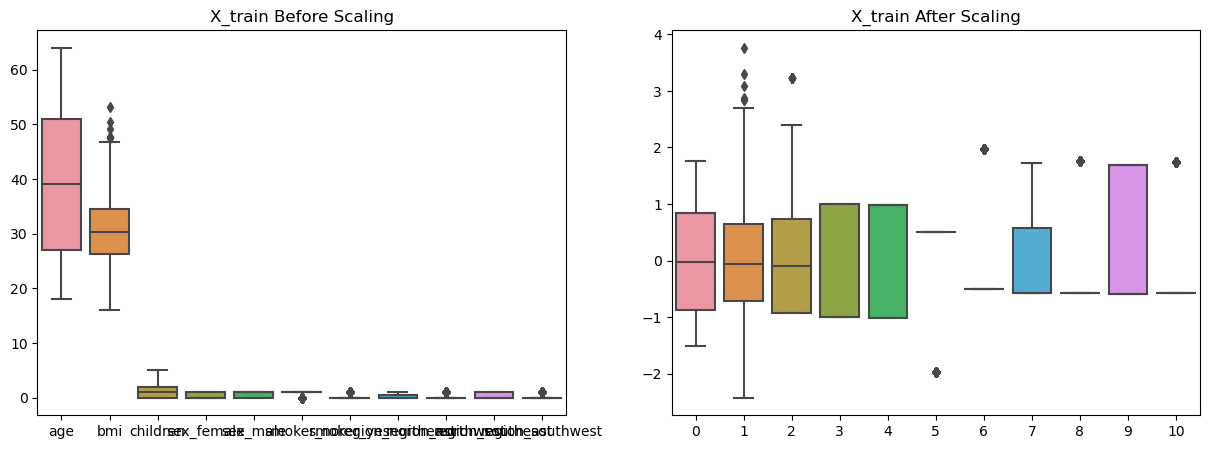

In [29]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## Linear Regression Model

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 4240.544160642064
R2 Score 0.7673735655029627


In [31]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(linreg,open('linreg.pkl','wb'))

In [ ]:
#33	male	22.705	0	no	northwest	

In [37]:
linreg.predict([check()])

Enter the Age:  64
Enter the bmi:  19
Enter the children: 1
Enter the gender:       type {male,female} male
Are you a Smoker?:     type {yes,no} yes
which region ?         type {NE,NW,SE,SW} NE


array([-7.27833555e+16])

In [5]:
def check():
    GM = 0
    GF = 0
    SN = 0
    SY = 0
    R_NE = 0
    R_NW = 0
    R_SE = 0
    R_SW = 0
    age= int(input("Enter the Age: "))
    bmi= int(input("Enter the bmi: "))
    children= int(input("Enter the children:"))
    gender= input("Enter the gender:       type {male,female}")
    if gender == "male":
        GM = 1
    else :
        GF= 1
    Smoker = input("Are you a Smoker?:     type {yes,no}")
    if Smoker == "yes":
        SY = 1
    else :
        SN = 1    
    region = input("which region ?         type {NE,NW,SE,SW}")
    if region == "NE":
        R_NE = 1
    if region == "NW":
        R_NW = 1
    if region == "SE":
        R_SE = 1
    if region == "SW":
        R_SW = 1
    return age, bmi, children ,GF,GM,SN,SY,R_NE,R_NW,R_SE,R_SW


print(check())

Enter the Age:  34
Enter the bmi:  34
Enter the children: 2
Enter the gender:       type {male,female} male
Are you a Smoker?:     type {yes,no} no
which region ?         type {NE,NW,SE,SW} NW


(34, 34, 2, 0, 1, 1, 0, 0, 1, 0, 0)
